# Тут различные эксперименты в плане архитектуры сети

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from math import floor

from data_generator import DataGenerator
from trainer import Flatten, ModelTrainer

import gc

In [17]:
TEST_DIR_NAME = 'simple_image_classification\\test\\'
MARKUP_FILE_NAME = 'simple_image_classification\\labels_trainval.csv'

TRAIN_RATIO = 0.7
TEST_RATIO = 1 - TRAIN_RATIO
INPUT_SIZE = 64 * 64 * 3
IMAGE_SIZE = (64, 64)
CHANNELS = 3
NUM_CLASSES = 200

In [3]:
df = pd.read_csv(MARKUP_FILE_NAME)
# кол-во классов
# print(len(set(list(df['Category'].values))))
border = floor(len(df) * TRAIN_RATIO)
df_train = df[:border]
df_test = df[border:]
    
train_gen = DataGenerator(image_names=df_train['Id'], labels=df_train['Category'])
test_gen = DataGenerator(image_names=df_test['Id'], labels=df_test['Category'])

trainer = ModelTrainer(train_gen, test_gen)

In [4]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

In [15]:
epochs = 15

In [5]:
model_ind = 0

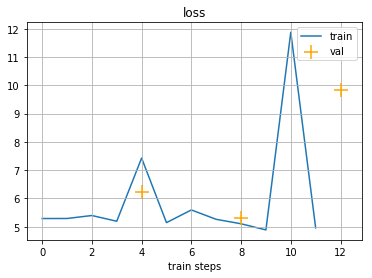

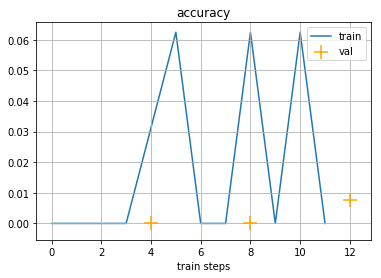

Epoch: 2, val loss: 9.819620847702026, val accuracy: 0.0078125
Epoch 3 of 15


KeyboardInterrupt: 

In [22]:
hidden = 256
filters = 64
kernel=3

model = nn.Sequential(
    nn.Conv2d(in_channels=CHANNELS, out_channels=filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.Conv2d(in_channels=filters, out_channels=2*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    nn.Conv2d(in_channels=2*filters, out_channels=2*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.Conv2d(in_channels=2*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=2, padding=kernel // 2),
    nn.Conv2d(in_channels=4*filters, out_channels=4*filters, kernel_size=kernel, stride=1, padding=kernel // 2),
    Flatten(),
    nn.Linear(64 * filters, hidden),
    nn.Linear(hidden, NUM_CLASSES),
    nn.LogSoftmax(dim=-1),
    )
model_ind += 1
trainer.set_model(model)

model=None
gc.collect()
torch.cuda.empty_cache()
trainer.train(n_epochs=epochs, plot_history=plot_history, lr=1e-3)
torch.save(trainer.get_model(), 'models/model_%04d' % model_ind)